In [ ]:
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as s
from sklearn.model_selection import train_test_split
import warnings
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.exceptions import UndefinedMetricWarning

files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


{'WA_Fn-UseC_-Telco-Customer-Churn.csv': b'customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn\r\n7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No\r\n5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No\r\n3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes\r\n7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No\r\n9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes\r\n9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.

In [ ]:
churn_df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
print(churn_df.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [ ]:
selected_columns = ['tenure', 'Contract', 'MonthlyCharges', 'TotalCharges', 'InternetService',
    'PaymentMethod', 'OnlineSecurity', 'TechSupport', 'StreamingTV', 'PaperlessBilling', 'Churn']

In [ ]:
churn_copy_df = churn_df[selected_columns].copy()

--> Analysis of chosen attributes and target attribute

In [ ]:
print(churn_copy_df[selected_columns].dtypes)

tenure                int64
Contract             object
MonthlyCharges      float64
TotalCharges         object
InternetService      object
PaymentMethod        object
OnlineSecurity       object
TechSupport          object
StreamingTV          object
PaperlessBilling     object
Churn                object
dtype: object


We display the data types of each column

In [ ]:
churn_copy_df['TotalCharges'] = pd.to_numeric(churn_copy_df['TotalCharges'], errors='coerce')

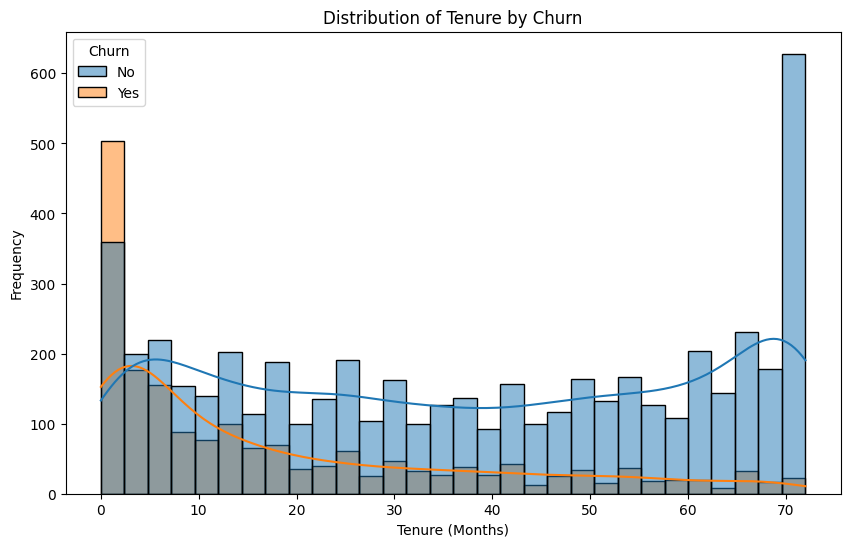

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=churn_copy_df, x='tenure', hue='Churn', kde=True, bins=30)
plt.title('Distribution of Tenure by Churn')
plt.xlabel('Tenure (Months)')
plt.ylabel('Frequency')
plt.show()

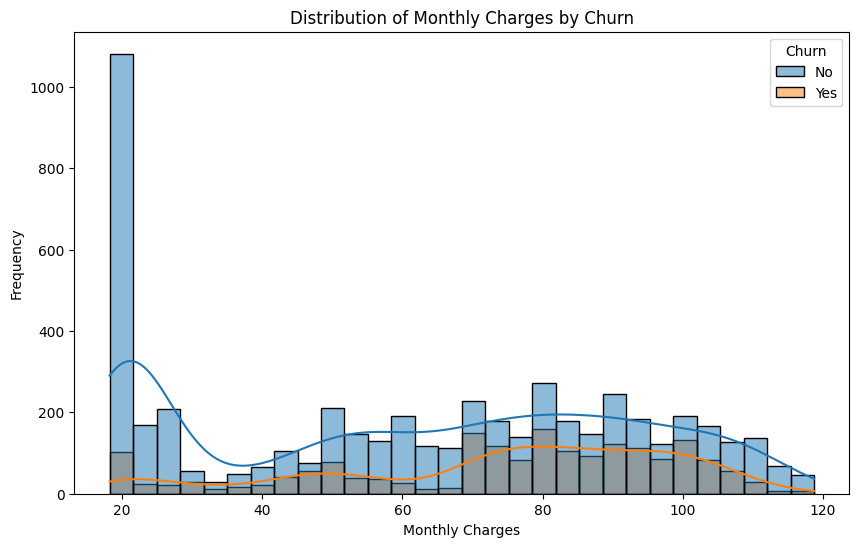

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=churn_copy_df, x='MonthlyCharges', hue='Churn', kde=True, bins=30)
plt.title('Distribution of Monthly Charges by Churn')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()

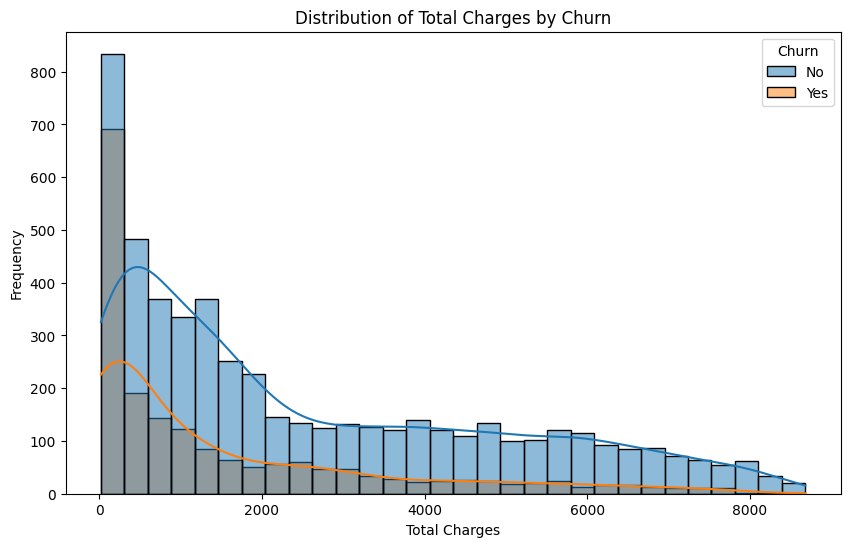

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=churn_copy_df, x='TotalCharges', hue='Churn', kde=True, bins=30)
plt.title('Distribution of Total Charges by Churn')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.show()

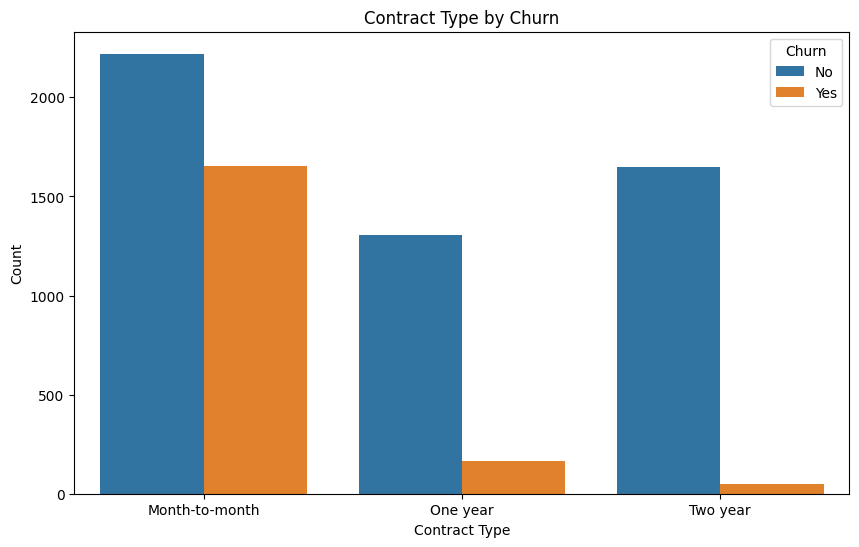

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=churn_copy_df, x='Contract', hue='Churn')
plt.title('Contract Type by Churn')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

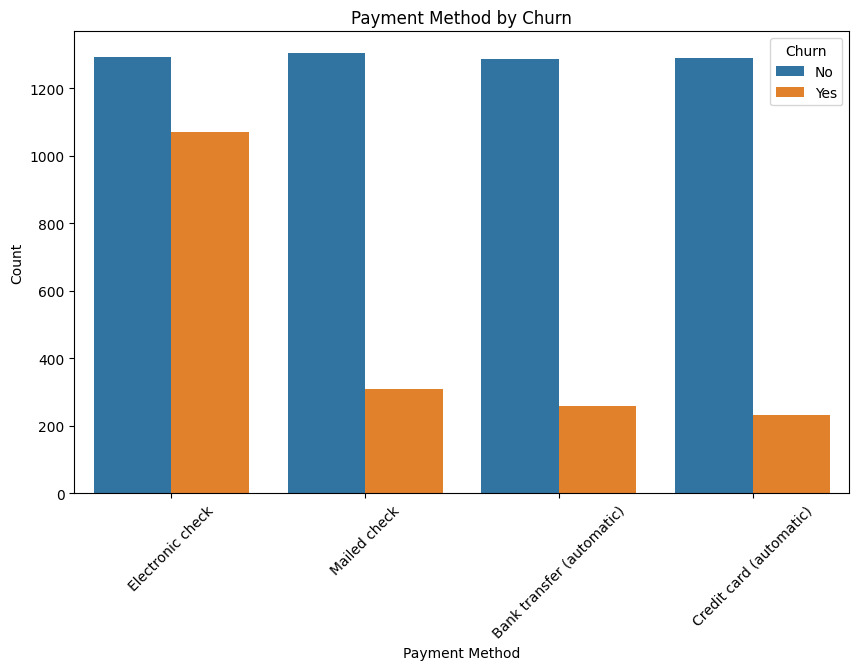

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=churn_copy_df, x='PaymentMethod', hue='Churn')
plt.xticks(rotation=45)
plt.title('Payment Method by Churn')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()

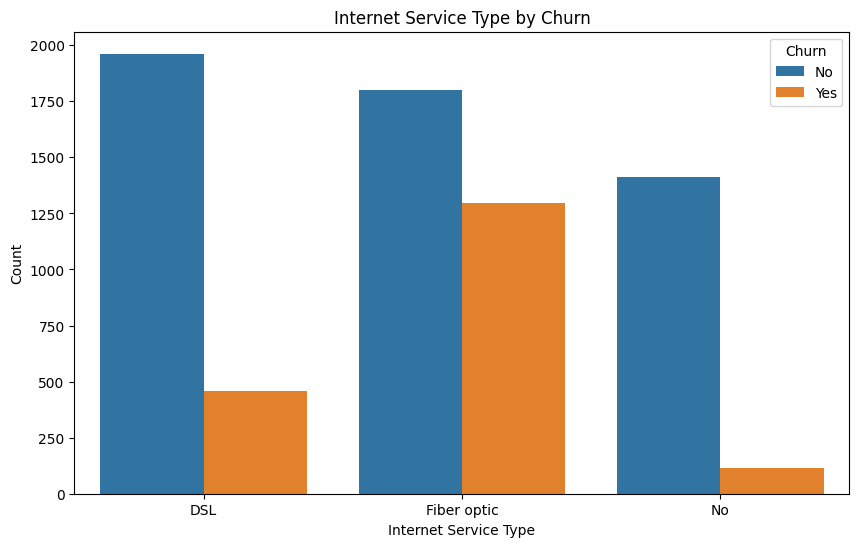

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=churn_copy_df, x='InternetService', hue='Churn')
plt.title('Internet Service Type by Churn')
plt.xlabel('Internet Service Type')
plt.ylabel('Count')
plt.show()

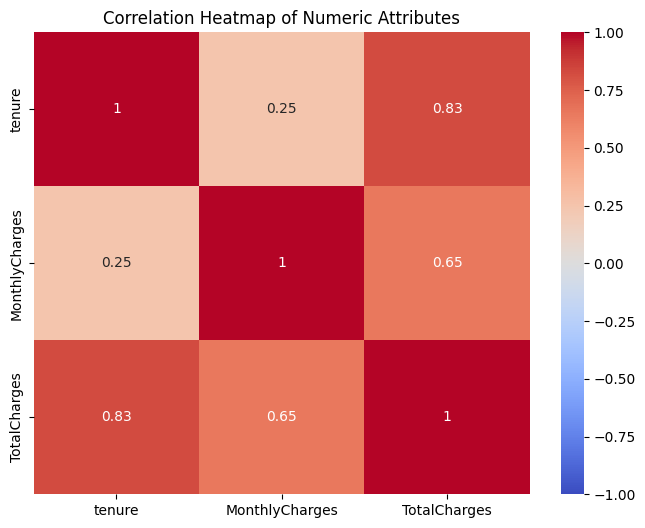

In [ ]:
correlation_matrix = churn_copy_df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Numeric Attributes")
plt.show()

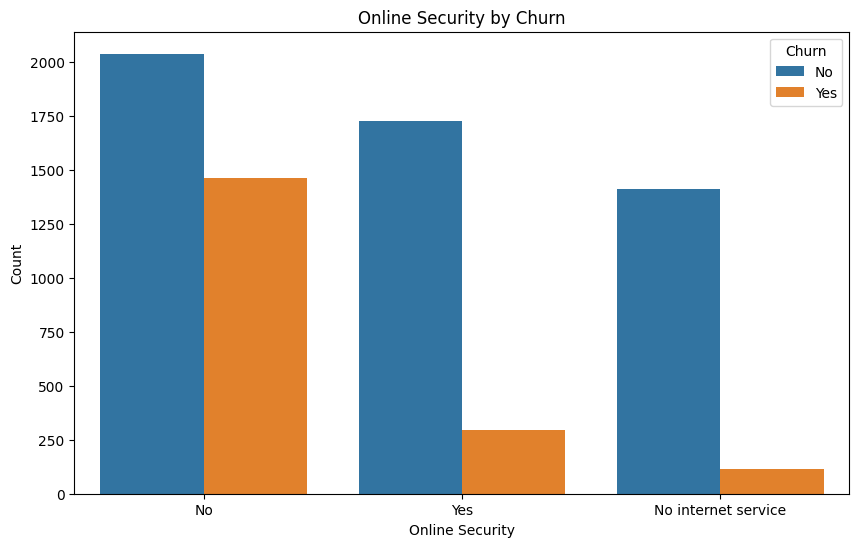

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=churn_copy_df, x='OnlineSecurity', hue='Churn')
plt.title('Online Security by Churn')
plt.xlabel('Online Security')
plt.ylabel('Count')
plt.show()

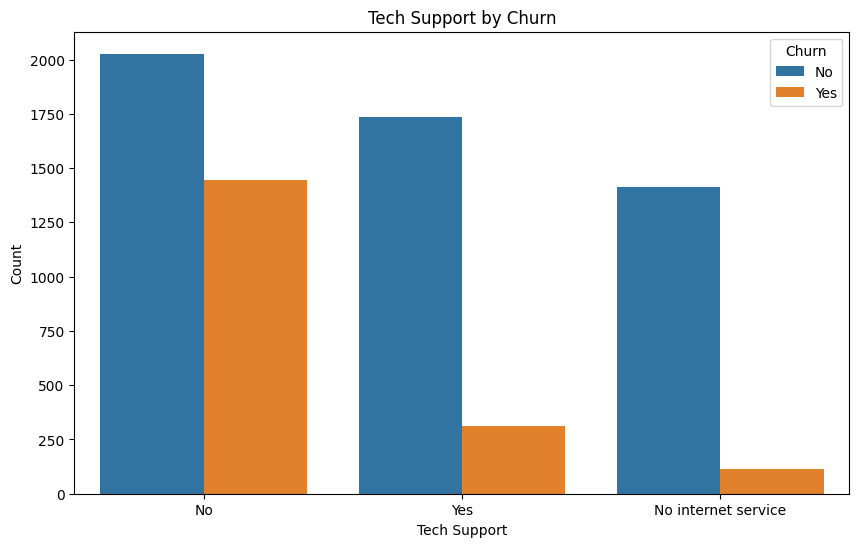

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=churn_copy_df, x='TechSupport', hue='Churn')
plt.title('Tech Support by Churn')
plt.xlabel('Tech Support')
plt.ylabel('Count')
plt.show()

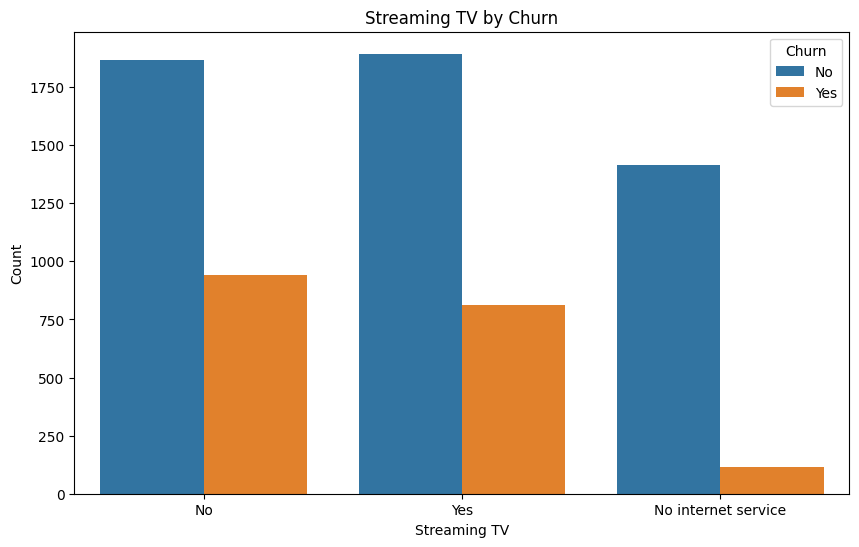

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=churn_copy_df, x='StreamingTV', hue='Churn')
plt.title('Streaming TV by Churn')
plt.xlabel('Streaming TV')
plt.ylabel('Count')
plt.show()

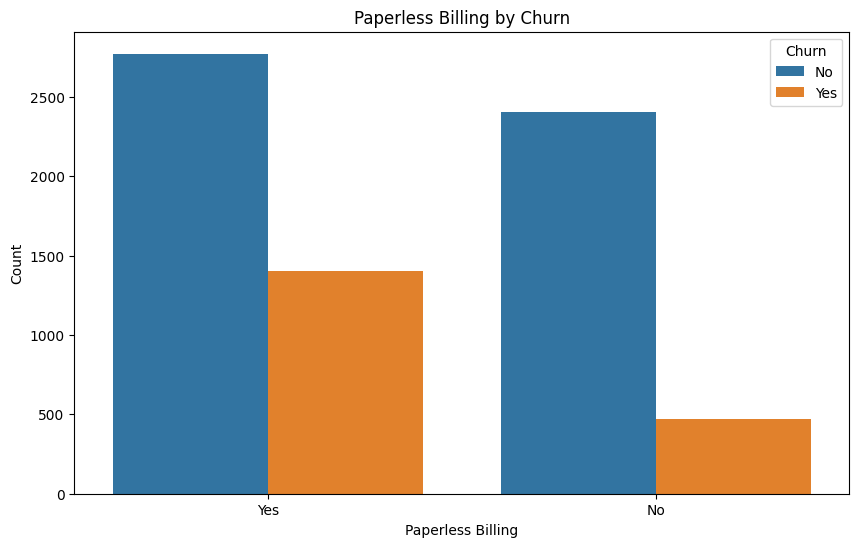

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=churn_copy_df, x='PaperlessBilling', hue='Churn')
plt.title('Paperless Billing by Churn')
plt.xlabel('Paperless Billing')
plt.ylabel('Count')
plt.show()

--> Analysis of target attribute

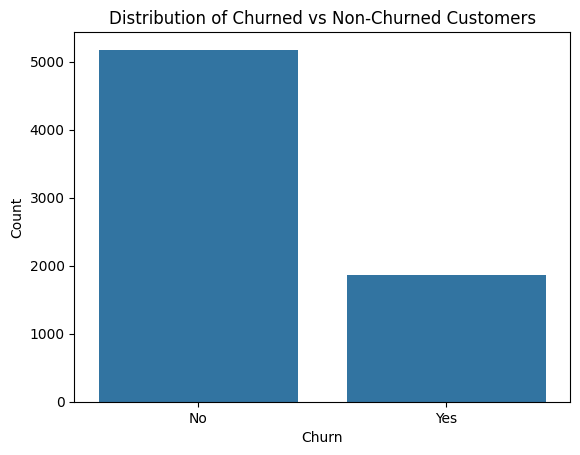

In [ ]:
sns.countplot(data=churn_copy_df, x='Churn')
plt.title('Distribution of Churned vs Non-Churned Customers')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

In [ ]:
train_df, test_df = train_test_split(churn_df, test_size=0.2, random_state=42)

Here, we splitted the data to be 80% for training (which we implemented in the markov model) and 20% testing.

In [ ]:
train_df = train_df.sort_values(by='tenure')
test_df = test_df.sort_values(by='tenure')

We then sorted by tenure so we assume chronological order (lower tenures --> early in the customer journey). This makes it easy for us to treat the data/each row as a sequential event.

In [ ]:
print("Training Set:")
print(train_df.head())
print("\nTesting Set:")
print(test_df.head())

Training Set:
      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
5218  2923-ARZLG    Male              0     Yes        Yes       0   
488   4472-LVYGI  Female              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
5218          Yes                No              No  No internet service  ...   
488            No  No phone service             DSL                  Yes  ...   
3826          Yes               Yes              No  No internet service  ...   
1082          Yes               Yes              No  No internet service  ...   
3331          Yes                No              No  No internet service  ...   

         DeviceProtection          TechSupport          StreamingTV  \
5218  N

In [ ]:
def categorize_state(row):
    if row['Churn'] == 'Yes':
        return 'Churned'
    elif row['tenure'] <= 12 and row['MonthlyCharges'] <= 50:
        return 'Active'
    elif row['Contract'] == 'Month-to-month' and row['MonthlyCharges'] > 70:
        return 'At Risk'
    elif row['tenure'] > 36 and row['Contract'] != 'Month-to-month':
        return 'Loyal'
    else:
        return 'Neutral'

Here, we categorize each customer into a state based on attributes (churn, tenure, contrat, and monthly charges). The states are either (Churned, Active, At risk, Loyal, Neutral). Then we create a new column for the dataset that contains the state of each customer.

In [ ]:
train_df['state'] = train_df.apply(categorize_state, axis=1)
train_df['Next'] = train_df['state'].shift(-1)
train_df = train_df.dropna(subset=['Next'])
print(train_df[['state', 'Next']].head())

        state     Next
5218   Active  Neutral
488   Neutral   Active
3826   Active   Active
1082   Active   Active
3331   Active   Active


Then, we applied the function and to create the next column, it is a copy of the state (current) but shifted below by one as shown in the output below. The last row is dropped because it will not have a next.

In [ ]:
print(train_df[['state', 'Next']])

        state     Next
5218   Active  Neutral
488   Neutral   Active
3826   Active   Active
1082   Active   Active
3331   Active   Active
...       ...      ...
3023    Loyal    Loyal
4057    Loyal    Loyal
588     Loyal  Churned
6424  Churned    Loyal
3203    Loyal    Loyal

[5633 rows x 2 columns]


This is shown to ensure that customers that are churned, remain churned.

In [ ]:
markov_model = {}

for i in range(len(train_df['state']) - 1):
    curr_state = train_df['state'].iloc[i]
    next_state = train_df['Next'].iloc[i]

    if curr_state not in markov_model:
        markov_model[curr_state] = {}
    if next_state in markov_model[curr_state]:
        markov_model[curr_state][next_state] += 1
    else:
        markov_model[curr_state][next_state] = 1

for curr_state, transitions in markov_model.items():
    total = sum(transitions.values())
    for state in transitions:
        markov_model[curr_state][state] = transitions[state] / total

print("Transition Matrix:")
for state, transitions in markov_model.items():
    print(f"{state}: {transitions}")

Transition Matrix:
Active: {'Neutral': 0.13529411764705881, 'Active': 0.27450980392156865, 'Churned': 0.4843137254901961, 'At Risk': 0.10588235294117647}
Neutral: {'Active': 0.05850091407678245, 'Neutral': 0.4085923217550274, 'Churned': 0.25685557586837293, 'At Risk': 0.21663619744058502, 'Loyal': 0.05941499085923217}
Churned: {'Churned': 0.3803475935828877, 'At Risk': 0.14037433155080214, 'Active': 0.15842245989304812, 'Neutral': 0.19184491978609625, 'Loyal': 0.12901069518716576}
At Risk: {'Active': 0.08468244084682441, 'Churned': 0.2627646326276463, 'At Risk': 0.16687422166874222, 'Neutral': 0.273972602739726, 'Loyal': 0.21170610211706103}
Loyal: {'Loyal': 0.7530364372469636, 'Neutral': 0.0410641989589358, 'Churned': 0.10873337189126663, 'At Risk': 0.09716599190283401}


Then we build the actual model, here we will iterate through each row in the trained dataset to count the transitions from “State” to “Next”. If the “Current” state isn't in the Markov Model, we will create a new entry for it. Then we check the “Next” for each state, if the pair exists, we increment the count by 1 to this pair (to keep track of how many times this transition happened), if not then we set it to 1 (indicates that this transition occurred only once). The final result will be all transitions of all states are calculated as probabilities. If there is no probability of a transition (the value is 0) it is omitted from the transitions printed.

In [ ]:
test_df['state'] = test_df.apply(categorize_state, axis=1)
def predict_next_state(current_state, transition_matrix):
    if current_state in transition_matrix:
        next_state_probs = transition_matrix[current_state]
        return max(next_state_probs, key=next_state_probs.get)
    else:
        return 'Neutral'
test_df['PredictedNext'] = test_df['state'].apply(lambda x: predict_next_state(x, markov_model))
test_df['ActualNext'] = test_df['state'].shift(-1)
test_df = test_df.dropna(subset=['ActualNext'])

Here, we are in the 20% of the testing part, we categorized each customer’s state(current) in the test data, and created a function that will predict the customer's next state using the learned probabilities from the Markov Model that was created and trained. The actualnext is derived by shifting just as done in training while testing is based on pure prediction of the Model.

In [ ]:
mismatches = (test_df['ActualNext'] != test_df['PredictedNext']).sum()
total = len(test_df)
accuracy = 1 - (mismatches / total)
print("\nModel Accuracy:", accuracy)
print("\nMismatches between Actual and Predicted Next State:")
print(test_df[test_df['ActualNext'] != test_df['PredictedNext']][['ActualNext', 'PredictedNext']])


Model Accuracy: 0.5106534090909092

Mismatches between Actual and Predicted Next State:
     ActualNext PredictedNext
6670    Churned       Neutral
185      Active       Churned
4837     Active       Churned
3362     Active       Churned
199      Active       Churned
...         ...           ...
3439      Loyal       Churned
6629    At Risk         Loyal
3820      Loyal       Neutral
59      Churned         Loyal
4513      Loyal       Churned

[689 rows x 2 columns]


We compared the predicted values to the actual results by counting mismatches. Then we calculated the acccuracy by dividing the mismatches by the total number of rows.

Since the accuracy is not too high or too low (0.51), the model performs averagely at prediction.

In [ ]:
actual = test_df['ActualNext']
predicted = test_df['PredictedNext']
conf_matrix = confusion_matrix(actual, predicted, labels=['Churned', 'Active', 'At Risk', 'Loyal', 'Neutral'])
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[212   0   0  34 127]
 [ 97   0   0   0  33]
 [ 70   0   0  40  79]
 [ 38   0   0 350  61]
 [ 86   0   0  24 157]]


Here the rows represent the actual states in the same order as written in the labels, while columns represent the predicted states. For example, in row 1 212 instances of churned were correctly predicted as churned, 0 instances of Churned were predicted as Active, 0 instances of Churned were predicted as At Risk, 34 instances of Churned were misclassified as Loyal, and finally 127 instances of Churned were misclassified as Neutral. And so on for the rest of the states. As a final observation, it performs best to identify loyal and neutral states.

In [ ]:
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
class_report = classification_report(actual, predicted, target_names=['Churned', 'Active', 'At Risk', 'Loyal', 'Neutral'])
print("\nClassification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

     Churned       0.00      0.00      0.00       130
      Active       0.00      0.00      0.00       189
     At Risk       0.42      0.57      0.48       373
       Loyal       0.78      0.78      0.78       449
     Neutral       0.34      0.59      0.43       267

    accuracy                           0.51      1408
   macro avg       0.31      0.39      0.34      1408
weighted avg       0.43      0.51      0.46      1408



Here, we did a classification report using multiple measures and we suppressed warnings that showed up because of probabilities that are 0. For example, since precision and recall are 0 in churned and active the models struggles to predict it properly. But further confirms that it is best with Loyal customers.